## 2.1 Plotting the Data 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [129]:
ex1data1 = np.loadtxt(open('ex1data1.txt'), delimiter=',')
ex1data1[:5]
x = ex1data1[:,0]
y = ex1data1[:,1]

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

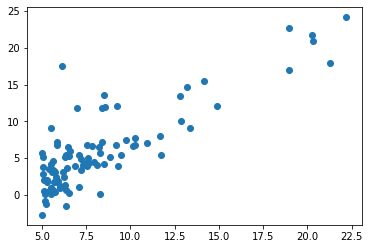

In [91]:
plt.scatter(x,y)
plt.ylabel='Profit in $10,000s'
plt.xlabel='Population of City in 10,000s'

## 2.2 Gradient Descent

In [150]:
len = 97
I = np.ones(len)
X = (np.dstack((I,x))).reshape(len,2)
Y = y.reshape(len,1)
theta = np.zeros((2, 1))

iterations = 1500
alpha = 0.01

![](https://tva1.sinaimg.cn/large/006tNbRwgy1g9pj6in4m5j316805ajrb.jpg)

In [163]:
def computeCost(X, Y, theta):
    J = sum((np.dot(X, theta) - Y) **2)/2.0/len

    return J

In [165]:
computeCost(X,Y,theta)

array([32.07273388])

![](https://tva1.sinaimg.cn/large/006tNbRwgy1g9pj7f29rpj315w04cq2y.jpg)

In [183]:
def gradientDescent(X, Y, theta, alpha, iterations):
    """Gradient Descent for (Multivariate) Linear Regression

    Parameters
    ----------
    X : np.ndarray, like (49 * 2)
    y : np.ndarray, like (49 * 1)
    theta : np.ndarray, like (49 * 1)
    alpha : learning rate
    num_iters : number of iter

    Returns
    -------
    tuple(J_history, theta)
    J_history : np.ndarray, like (num_iters, 1)
    theta : theta of convergence, like (2 * 1)
    """

    J_history = np.zeros((iterations, 1))
    for iteration in range(iterations):
        theta = theta - np.dot(X.T, np.dot(X, theta) - Y) *alpha / len
        J_history[iteration, 0] = computeCost(X, Y, theta)
    return J_history, theta_final


In [193]:
theta_final = gradientDescent(X, Y, theta, alpha, iterations)[1]
theta_final

array([[-3.63029144],
       [ 1.16636235]])

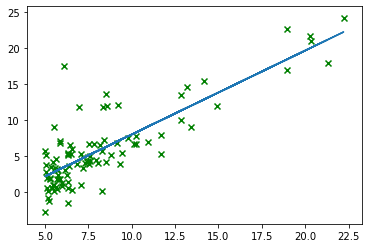

In [199]:
plt.plot(x.reshape(97),np.dot(X, theta_final))
plt.scatter(x,y, color='green',marker='x')

## 2.4 Visualizing J(θ)

In [200]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure
ax = Axes3D(fig)

ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射